In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")

In [3]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [4]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  NACCAGEB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.6911978542342931, pvalue=0.406233041637733)
Test: f_t, p_value_t -3.010E+00 2.768E-03
ANOVA: f, p_value: 9.062E+00 2.768E-03
--------------------------------------------------------------------------------


Group1:  [60 76 71 72 64 29 72 61 72 60 89 68 72 70 83 75 66 85 50 63 91 51 93 73
 72 71 72 70 59 71 71 47 64 69 85 35 73 60 59 63 55 73 72 58 56 77 68 73
 58 75 80 75 47 57 71 66 66 75 78 75 71 67 90 63 60 62 57 61 59 71 75 63
 75 65 67 64 68 66 78 62 56 67 77 70 92 64 57 62 59 82 68 62 68 63 78 67
 56 57 46 75 82 78 68 83 61 60 65 80 70 67 54 77 56 75 49 56 75 53 69 69
 70 64 83 64 80 71 68 75 70 76 57 68 68 62 62 77 57 68 79 78 54 63 87 76
 70 77 62 64 85 63 61 70 78 76 81 80 72 70 54 74 61 58 49 52 80 75 57 79
 67]


Group2:  [82 66 60 51 80 68 49 67 78 71 71 64 82 75 67 84 62 47 61 69 67 83 88 65
 37 72 82 83 74 65 40 72 63 59 73 85 58 65 73 3

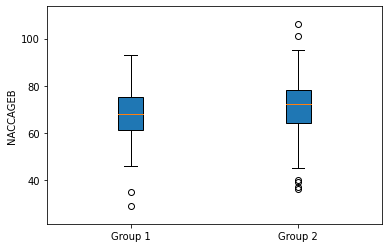

************************************************************************************************************************




Feature:  NPWBRWT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.6890127314081783, pvalue=0.4069753398743461)
Test: f_t, p_value_t -1.823E+00 6.895E-02
ANOVA: f, p_value: 3.325E+00 6.895E-02
--------------------------------------------------------------------------------


Group1:  [890 1160 980 994 1150 1040 1200 1015 1194 661 1120 1417 1370 940 1210
 1200 999 1080 866 885 1246 1050 1066 1185 1250 1140 1330 1361 1030 941
 1094 1160 1040 1360 1180 1280 988 1475 831 1200 1387 1204 1340 1134 950
 1210 1310 1200 1200 1350 1090 1072 1088 990 1110 1046 1210 1404 1150 1330
 1450 1440 1042 1100 1099 1010 1420 1110 1088 1200 1030 980 1053 1175 100
 1082 1130 1290 1265 1374 908 1190 1069 1170 890 1392 1338 1000 1230 1240
 1060 1157 965 1035 1286 1171 1021 1150 1196 1106 1260 1020 1193 1290 1182
 997 140

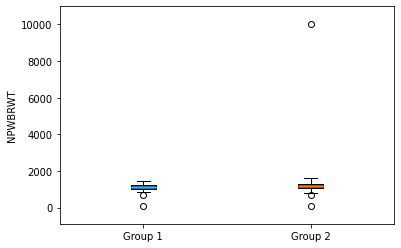

************************************************************************************************************************




Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.2206349023251153, pvalue=0.26987314962215214)
Test: f_t, p_value_t -1.583E+00 1.142E-01
ANOVA: f, p_value: 2.506E+00 1.142E-01
--------------------------------------------------------------------------------


Group1:  [62 81 75 83 71 37 74 63 78 62 94 68 77 74 92 77 69 89 51 67 98 54 100 83
 86 82 82 76 64 80 77 52 71 73 90 42 83 63 63 72 59 75 77 64 58 82 71 83
 63 81 87 85 50 61 72 72 78 82 86 78 78 71 96 65 62 68 59 65 61 73 80 66
 84 67 70 67 71 72 90 70 62 68 83 77 97 67 62 66 64 86 72 63 73 67 87 70
 61 62 49 84 88 84 73 86 64 63 68 84 73 73 59 79 63 77 54 60 77 58 75 73
 76 72 92 68 83 75 80 81 71 87 60 70 70 69 66 88 61 72 84 84 61 67 96 80
 73 82 64 65 94 65 66 73 82 78 84 90 75 73 57 77 67 59 50 56 84 77 66 83
 70]


Gr

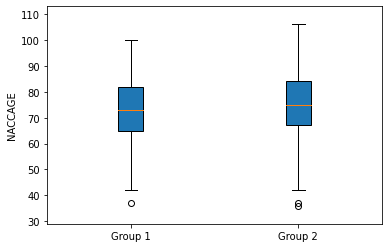

************************************************************************************************************************




Feature:  HOMEHOBB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=81.86444623559485, pvalue=5.596693216490977e-18)
Test: f_t, p_value_t 3.322E+01 2.328E-104
ANOVA: f, p_value: 7.961E+02 2.328E-104
--------------------------------------------------------------------------------


Group1:  [3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0
 3.0 3.

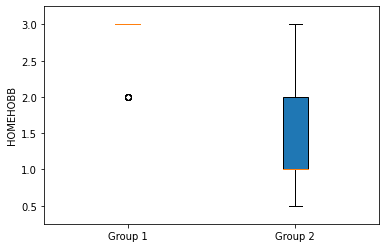

************************************************************************************************************************




Feature:  COMMUN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=8.36158089028515, pvalue=0.004032885680001616)
Test: f_t, p_value_t 2.817E+01 2.861E-97
ANOVA: f, p_value: 7.330E+02 2.861E-97
--------------------------------------------------------------------------------


Group1:  [2.0 3.0 3.0 2.0 2.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 2.0 3.0 3.0 2.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 2.0 3.0 3.0 2.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 2.0 3.0 2.0 3.0 3.0 3.0
 2.0 2.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 2.0 2.0 3.0 3.0 3.0 2.0 3.0 3.0
 3.0 2.0 2.0 2.0 2.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0
 3.0 2.0 3.0 2.0 3.0 3.0 3.0 3.0 2.0 1.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 2.0
 3.0 3.0 2.0 

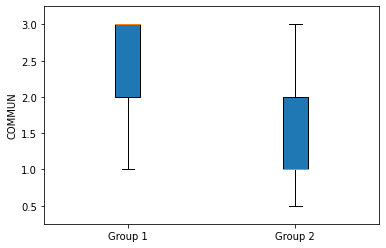

************************************************************************************************************************




Feature:  DECSUB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=35.603412209794755, pvalue=5.170502362525717e-09)
Test: f_t, p_value_t 5.000E+00 1.100E-06
ANOVA: f, p_value: 3.041E+01 1.100E-06
--------------------------------------------------------------------------------


Group1:  [0 1 1 1 1 1 1 1 1 0 8 1 1 1 8 0 1 1 0 1 1 8 0 0 8 8 1 1 8 1 1 1 1 1 1 1 8
 0 0 8 0 1 8 1 1 8 1 1 8 1 0 1 1 0 0 0 8 0 8 1 8 8 8 1 1 8 1 8 1 1 0 8 1 1
 0 1 0 0 8 0 8 1 0 1 1 8 0 0 1 1 1 1 8 8 8 8 8 1 1 1 8 1 1 0 8 0 1 0 1 0 0
 0 1 1 8 1 0 8 8 8 1 8 1 1 1 1 1 0 0 8 1 1 8 0 0 8 1 8 8 8 1 1 1 0 1 1 1 1
 1 0 8 0 1 1 8 8 1 0 0 8 8 1 1 1 1 0 1 0 1]


Group2:  [8 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0
 1 1 1 0 1 0 1 1 1 8 1 1 1 0 1 1 8 0 0 1 1 8 0 1 1 1 1 1 1 1 8 1 0 1 8 1 1
 0 0 1 1 0 1 1 8

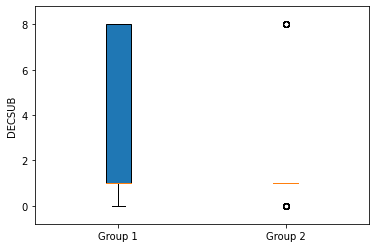

************************************************************************************************************************




Feature:  NPPATH5


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.033805981483427, pvalue=0.30985597665010084)
Test: f_t, p_value_t -1.017E+00 3.099E-01
ANOVA: f, p_value: 1.034E+00 3.099E-01
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Group2:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

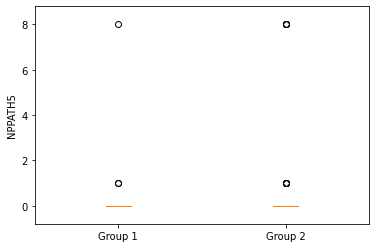

************************************************************************************************************************




Feature:  ORIENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.0630329103298317, pvalue=0.15165931790694484)
Test: f_t, p_value_t 2.975E+01 3.694E-105
ANOVA: f, p_value: 8.851E+02 3.694E-105
--------------------------------------------------------------------------------


Group1:  [3.0 3.0 2.0 3.0 3.0 2.0 2.0 3.0 3.0 1.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0
 3.0 3.0 3.0 3.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0
 3.0 2.0 3.0 3.0 2.0 2.0 3.0 2.0 3.0 3.0 1.0 2.0 3.0 2.0 3.0 3.0 2.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0 3.0 3.0 3.0 1.0 3.0
 3.0 3.0 3.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 2.0 2.0 3.0 2.0
 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0
 1.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 1.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0
 3.0 3.0 3

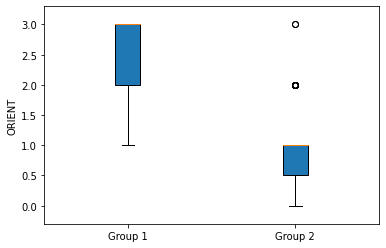

************************************************************************************************************************




Feature:  NACCLBDS


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=4.392266952164944, pvalue=0.03670462156897535)
Test: f_t, p_value_t -2.500E+00 1.297E-02
ANOVA: f, p_value: 4.392E+00 1.297E-02
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]


Group2:  [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 8 1 0 0

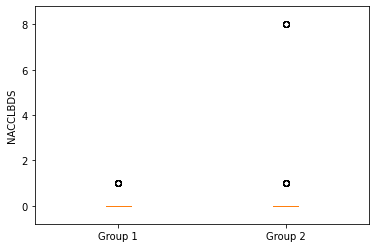

************************************************************************************************************************




Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=9.47963869873702, pvalue=0.0022149610012863813)
Test: f_t, p_value_t 3.163E+00 1.684E-03
ANOVA: f, p_value: 9.480E+00 1.684E-03
--------------------------------------------------------------------------------


Group1:  [8 1 8 1 8 1 8 8 8 8 8 8 1 8 1 8 8 8 8 8 1 8 1 8 1 1 1 8 8 8 8 8 8 8 8 1 1
 1 8 8 1 8 1 8 8 8 1 1 8 1 8 8 8 8 8 1 8 8 1 8 8 8 1 8 8 8 8 1 1 8 1 8 8 8
 8 8 8 8 1 8 8 8 8 8 8 8 8 8 8 8 1 8 8 8 8 8 8 8 8 8 1 1 8 8 8 8 8 8 1 1 8
 8 8 8 8 8 8 8 1 8 1 8 8 8 8 1 1 8 8 1 8 8 8 8 8 1 8 8 8 8 8 8 1 1 8 8 8 8
 8 8 8 8 8 8 8 1 8 8 8 8 8 8 8 8 1 8 8 8 8]


Group2:  [1 1 8 8 1 8 8 8 8 8 8 8 1 8 8 1 8 1 8 8 8 1 8 8 8 8 1 8 8 8 8 8 8 8 8 1 8
 1 8 8 1 8 8 8 8 8 8 0 8 1 8 8 8 8 8 8 8 0 1 8 1 1 8 8 8 8 8 8 1 8 8 8 1 1
 8 8 8 8 0 8 1 8

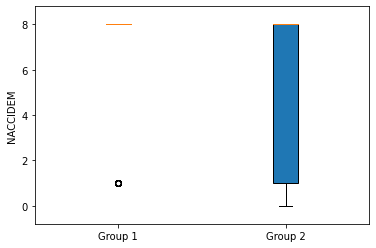

************************************************************************************************************************






In [5]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    
    bar_figure(group1_data,group2_data,feature_name)
    
    print("*"*120)
    print("\n\n\n")